<!-- vscode-jupyter-toc -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->
<a id='toc0_'></a>**Содержание**    
- [Числа Фибоначчи](#toc1_)    
  - [Ленивые вычисления (кэшировние, мемоизация)](#toc1_1_)    
  - [Время работы](#toc1_2_)    
  - [Задача на программирование: небольшое число Фибоначчи](#toc1_3_)    
  - [Задача на программирование: последняя цифра большого числа Фибоначчи](#toc1_4_)    
- [Наибольший общий делитель (GCD)](#toc2_)    
  - [Алгоритм Эвклида](#toc2_1_)    
- [Пределы для задач на O-нотацию](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- /vscode-jupyter-toc -->

# <a id='toc1_'></a>[Числа Фибоначчи](#toc0_)

Визуализатор рекурсии

    from rcviz import viz
    fib1 = viz(fib1)
    fib1(5)

In [2]:
# наивная реализация по определению
def fib1(n):
    assert n >= 0
    return n if n <= 1 else fib1(n - 1) + fib1(n - 2)

fib1(8), fib1(16)

(21, 987)

## <a id='toc1_1_'></a>[Ленивые вычисления (кэшировние, мемоизация)](#toc0_)

- полное ручное (словарь/массив)
- полное ручное (обертка (декоратор) со словарем/массивом)
- встроенные инструменты (functools.lru_cache)
- минимально необходимые данные для кеширования

In [3]:
cache = {}

def fib2(n):
    assert n >= 0
    if n not in cache:
        cache[n] = n if n <= 1 else fib2(n - 1) + fib2(n - 2)
    return cache[n]

fib2(8), fib2(16)

(21, 987)

In [4]:
def memo(f):
    """ декоратор, сохраняющий результаты в кэш
    аналог functools.lru_cache"""
    local_cache = {}

    def wrapper(n):
        if n not in local_cache:
            local_cache[n] = f(n)
        return local_cache[n]
    return wrapper

@memo   
def fib3(n):
    assert n >= 0
    return n if n <= 1 else fib3(n - 1) + fib3(n - 2)


fib3(8), fib3(16)


(21, 987)

In [5]:
from functools import lru_cache     # в 1,6 раза эффективнее ручного кеша на словаре

@lru_cache(maxsize=None)            # кэшировать все значения
def fib4(n):
    assert n >= 0
    return n if n <= 1 else fib4(n - 1) + fib4(n - 2)

fib4(8), fib4(16), fib4(80)

(21, 987, 23416728348467685)

In [6]:
def fib5(n):
    assert n >= 0
    fn, fn1 = 1, 0
    for i in range(n-1):
        fn, fn1 = fn + fn1, fn
    return fn  


def fib5(n):  # запоминаем только реально нужные вызовы
    f0, f1 = 0, 1
    if n > 1:
        for i in range(2, n):
            f1, f0 = f1 + f0, f1
        return f1
    else:
        return f1 if n == 2 else f0

fib5(8), fib5(16), fib5(80), fib5(1000)

(13,
 610,
 14472334024676221,
 26863810024485359386146727202142923967616609318986952340123175997617981700247881689338369654483356564191827856161443356312976673642210350324634850410377680367334151172899169723197082763985615764450078474174626)

## <a id='toc1_2_'></a>[Время работы](#toc0_)

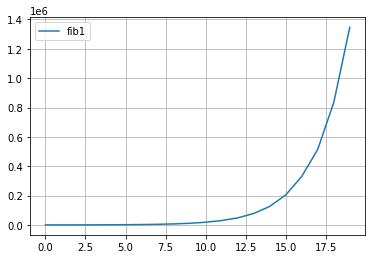

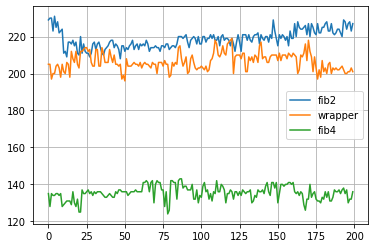

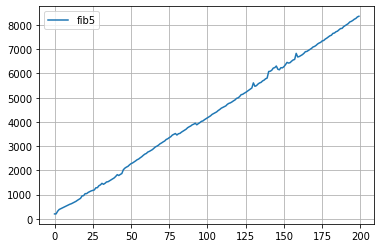

In [7]:
import time
from matplotlib import pyplot as plt

def timed(f, *args, n_iter=100):
    acc = float('inf')
    for i in range(n_iter):
        t0 = time.perf_counter_ns()
        f(*args)
        t1 = time.perf_counter_ns()
        acc = min(acc, t1 - t0)
    return acc

def compare(fs, args):
    # xs = list(range(len(args)))
    for f in fs:
        plt.plot(args, [timed(f, chunk) for chunk in args],
                 label=f.__name__)
    plt.legend()
    plt.grid(True)
    plt.show()

compare([fib1], list(range(20)))       # не кеширует предыдущие вычисления и многократно считает f(n-1)
compare([fib2, fib3, fib4], list(range(200)))
compare([fib5], list(range(200)))      # не кеширует предыдущие вычисления

## <a id='toc1_3_'></a>[Задача на программирование: небольшое число Фибоначчи](#toc0_)
Дано целое число 1≤n≤40, необходимо вычислить n-е число Фибоначчи

## <a id='toc1_4_'></a>[Задача на программирование: последняя цифра большого числа Фибоначчи](#toc0_)

Дано число 1≤n≤10^7, необходимо найти последнюю цифру n-го числа Фибоначчи.

In [8]:
def fib_digit(n):
    Fn, Fn1 = 1, 0
    for i in range(2, n+1):
        if Fn > 10: Fn = Fn % 10
        Fn, Fn1 = (Fn + Fn1) % 10, Fn
    if n == 0: Fn = 0
    return Fn  

N = 10
for n in range(1,N+1):
    print(fib5(n), fib_digit(n))

0 1
1 1
1 2
2 3
3 5
5 8
8 3
13 1
21 4
34 5


# <a id='toc2_'></a>[Наибольший общий делитель (GCD)](#toc0_)

In [9]:
import random

def test(gcd, n_iter=10):
    """testing gcd"""
    for i in range(n_iter):
        c = random.randint(0, 1024)
        a = c * random.randint(0, 128)
        b = c * random.randint(0, 128)
        assert gcd(a, a) == gcd(a, 0) == a
        assert gcd(b, b) == gcd(b, 0) == b
        assert gcd(a, 1) == gcd(b, 1) == 1
        d = gcd(a, b)
        assert a % d == b % d == 0

In [10]:
# полный перебор
def gcd1(a, b):
    assert a >= 0 and b >= 0
    for d in reversed(range(max(a, b) + 1)):
        if d == 0 or a % d == b % d == 0:
            return d

test(gcd1)

gcd1(8, 3), gcd1(8, 0), gcd1(0, 0)

(1, 8, 0)

## <a id='toc2_1_'></a>[Алгоритм Эвклида](#toc0_)

- НОД (a % b, b) == НОД(a, b)

In [11]:
# итеративный
def gcd2(a, b):
    assert a >= 0 and b >= 0
    while a and b:
        if a >= b:
            a %= b
        else:
            b %= a
    return max(a, b)

test(gcd2)

gcd2(100000000000000, 1000000000000000000)

100000000000000

In [12]:
# рекурсивный
def gcd3(a, b):
    assert a >= 0 and b >= 0
    if a == 0 or b == 0:
        return max(a, b)
    elif a >= b:
        return gcd3(a % b, b)
    else:
        return gcd3(a, b % a)

test(gcd3)

gcd3(24, 9), gcd3(6, 9), gcd3(6, 3), gcd3(0, 3) 

(3, 3, 3, 3)

In [13]:
# оптимизированный рекурсивный
def gcd4(a, b):         
    assert a >= 0 and b >= 0
    if a == 0 or b == 0:
        return max(a, b)
    return gcd4(b % a, a)

test(gcd4)

# <a id='toc3_'></a>[Пределы для задач на O-нотацию](#toc0_)

In [14]:
from sympy import limit, Symbol, oo, log, sqrt, factorial

x = Symbol('x')



In [15]:
expressions = [sqrt(x) / log(x, 2)**3,
               10*log(x, 2) / log(x, 2)**2,
               100*x*log(x, 2) / (x + log(x, 2)**2),
               (x**2 * log(x, 3)) / (x * log(x, 2)**2),
               log(2*x, 3) / log(3*x, 2),
               x * 2**x / 3**x,
               x**(3/10) / log(x, 5)]


print("x -> oo:\n")
for expr in expressions:
    limit_expr = limit(expr, x, oo)  # третий аргумент к чему стремится x (0 - нуль, oo - плюс бесконечность)
    print("{} -> {}".format(expr, limit_expr))

x -> oo:

sqrt(x)*log(2)**3/log(x)**3 -> oo
10*log(2)/log(x) -> 0
100*x*log(x)/((x + log(x)**2/log(2)**2)*log(2)) -> oo
x*log(2)**2/(log(3)*log(x)) -> oo
log(2)*log(2*x)/(log(3)*log(3*x)) -> log(2)/log(3)
2**x*3**(-x)*x -> 0
x**0.3*log(5)/log(x) -> oo


In [16]:
n = Symbol('n')
expressions = [log(log(n, 2)),
               sqrt(log(n, 4)), 
               log(n, 3), 
               log(n, 2) ** 2, 
               sqrt(n), 
               n / log(n, 5), 
               log(factorial(n),2), 
               3 ** log(n, 2), 
               n ** 2, 
               7 ** (log(n, 2)), 
               log(n, 2) ** (log(n, 2)),
               n ** (log(n, 2)),                
               n ** (sqrt(n)), 
               2 ** n, 
               4 ** n, 
               2 ** (3 * n), 
               factorial(n), 
               2 ** (2 ** n)
               ]

expressions = [log(n, 2),
               n**log(2, 3), 
               n*log(n,2),
               n**log(5, 4), 
               n**log(3, 2), 
               n**2, 
               n**2 * log(n,2),
               n**log(5, 2), 
               n**3
               ]

res = []
limits = []

for i in range(len(expressions)):
    for j in range(len(expressions)):
        if (i - j) in (-1, 1):
            limit_expr = limit(expressions[i] / expressions[j], n, oo)
            limits.append(limit_expr)
    res.append(limits)
    limits = []

res     # порядок возрастания сложности правильный, когда предел отношения ко всем предыдущим inf, а к следующим 0.

[[0], [oo, 0], [oo, 0], [oo, 0], [oo, 0], [oo, 0], [oo, 0], [oo, 0], [oo]]